#Results of Traffic Simulation Study

This notebook presents the results of a traffic simulation over a 1km stretch of road with 30 cars.  The cars are modelled to accelerate 2m/s/s up to a max of 34m/s.  Cars will randomly slow by 2m/s/s and also will slow to a speed equal to the distance between themselves and the car in front of them if they approach another car.  The road is one lane and modelled as circular.

In [1]:
from simulation import Simulation
from car import Car
from simulation import n_simulations
import numpy as np


In [2]:
%matplotlib inline

##Run Nine Simulations for Display

In [3]:
nine_simulations = n_simulations(9)

###Show result matrices for first simulation.  The first is the location of cars, the second is speed.

In [4]:
nine_simulations[0]

array([[[  5,  39,  73, ..., 926, 960, 995],
        [  5,  39,  73, ..., 926, 960, 995],
        [  7,  41,  73, ..., 928, 962, 997],
        ..., 
        [954, 969, 986, ..., 885, 898, 913],
        [962, 979, 998, ..., 891, 906, 923],
        [972, 991,  12, ..., 895, 912, 935]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  2,   2,   0, ...,   2,   2,   2],
        [  4,   4,   2, ...,   0,   4,   4],
        ..., 
        [  8,  10,  12, ...,   6,   8,  10],
        [ 10,  12,  14, ...,   4,   6,  12],
        [ 12,  14,  16, ...,   6,   8,  14]]])

###Show result matrices for last simulation.  The first is the location of cars, the second is speed.

In [5]:
nine_simulations[8]

array([[[  5,  39,  73, ..., 926, 960, 995],
        [  5,  39,  73, ..., 926, 960, 995],
        [  7,  41,  75, ..., 928, 962, 997],
        ..., 
        [780, 807, 816, ..., 731, 746, 767],
        [788, 809, 820, ..., 739, 756, 773],
        [798, 813, 826, ..., 749, 766, 781]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  2,   2,   2, ...,   2,   2,   2],
        [  4,   4,   4, ...,   4,   4,   4],
        ..., 
        [  8,   2,   4, ...,   8,  10,   6],
        [ 10,   4,   6, ...,  10,  10,   8],
        [  8,   2,   8, ...,  10,   8,  10]]])

In [6]:
nine_simulations[8][0].shape

(121, 30)

The results matrices are 121 rows by 30 columns.  The first 61 rows are 1 row for setting up the cars and 60 seconds to get cars up to speed.  The rows 61 to 121 are the speeds we will use for analysis.

##Display of 9 Simulations

A scatter plot is the best way to show the cars' movement over time.  The x axis is time, the y axis is location.  As an example, the 9th simulation is displayed below.

To give a recommendation for a new speed limit, take the mean speed of cars in the simulation and add the standard deviation of the speeds.

The first 61 time points set the cars in motion, so the mean of the last 60 data points will be used.

In [7]:
import matplotlib.pyplot as plt

In [8]:
speeds = nine_simulations[8][1][61:]

In [9]:
speeds

array([[ 6,  4, 10, ...,  0,  4,  3],
       [ 4,  6,  8, ...,  2,  3,  5],
       [ 6,  8, 10, ...,  4,  5,  5],
       ..., 
       [ 8,  2,  4, ...,  8, 10,  6],
       [10,  4,  6, ..., 10, 10,  8],
       [ 8,  2,  8, ..., 10,  8, 10]])

In [10]:
single_mean = (np.mean(speeds))
print(single_mean)
single_stdev = (np.std(speeds))
print(single_stdev)

15.7805555556
10.8459495626


#Based on data from one simulation, the average speed plus one standard deviation is 26.6 m/s.   This is the recommended speed limit.

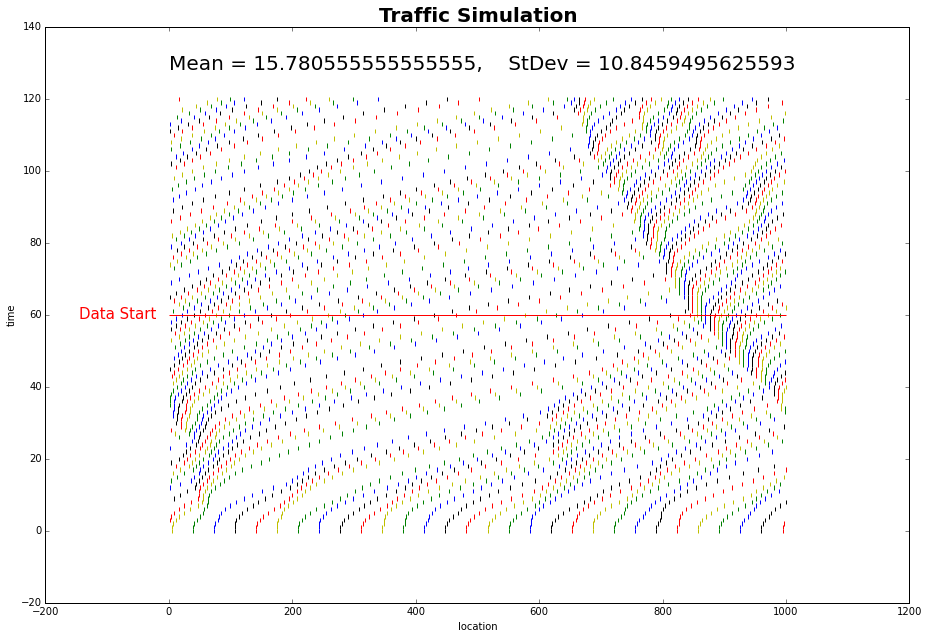

In [11]:
location = nine_simulations[8][0]
y = [[i] * 30 for i in range(121)]
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
plt.scatter(location, y, marker="|", c = ["y","g","b","k","r"])
#plt.scatter(location_array, times)
plt.xlabel("location")
plt.hlines(60, 0, 1000, color="red")
plt.text( 0, 128, 'Mean = {},    StDev = {}'.format(single_mean, single_stdev), fontsize=20)
plt.text( -145, 59, 'Data Start', fontsize=15, color="red")
plt.ylabel("time")
plt.title("Traffic Simulation", fontsize=20, fontweight='bold')

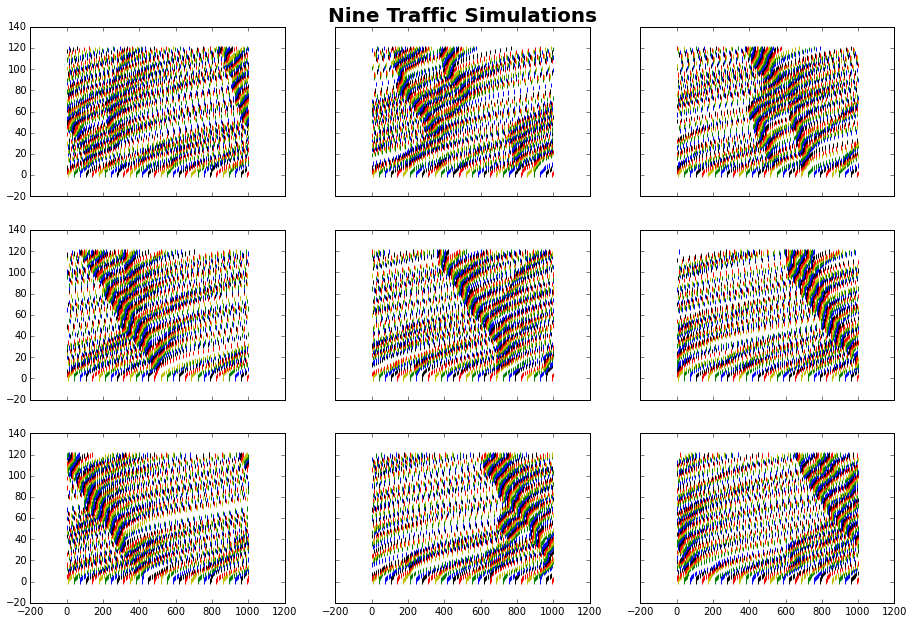

In [12]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * 30 for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations", fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

In [13]:
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]

In [14]:
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]

Next, calculate the mean speeds for the nine simulations.

In [15]:
print(mean_speeds)

[17.976111111111113, 14.763333333333334, 18.085555555555555, 16.488888888888887, 16.039444444444445, 14.305555555555555, 15.989444444444445, 16.151666666666667, 15.780555555555555]


And the standard deviations.

In [16]:
print(stdevs)

[9.0574699919083894, 10.154888806218739, 10.885995704074835, 11.246376645583277, 10.78111000893189, 12.54989916835201, 12.394147351885362, 12.119992551336177, 10.8459495625593]


Finally, the mean of the means and the mean of the standard deviations of the 9 simulations

In [17]:
print(np.mean(mean_speeds))
print(np.mean(stdevs))

16.175617284
11.115092199


###With nine simulations, the speed limit recommendation would be 27.

##To further analyze the data, 1000 simulations are run to look at the mean of the mean speeds and the mean of the standard deviations.

In [18]:
data_set = n_simulations(1000) 

In [19]:
data_speeds = [data_set[i][1][61:] for i in range(len(data_set))]

In [20]:
data_mean_speeds = [np.mean(data_speeds[i]) for i in range(len(data_speeds))]
data_stdevs = [np.std(data_speeds[i]) for i in range(len(data_speeds))]

Calculate the mean speed over 1000 simulations, and the mean standard deviation.

In [21]:
print(np.mean(data_mean_speeds))
print(np.mean(data_stdevs))

16.2067783333
10.5698860284


The speed limit recommendation using this data is 26.7 m/s.

Next let's look at the slowest and fastest mean speed over 1000 trials.

In [22]:
print("Slowest: {}".format(np.min(data_mean_speeds)))
print("Fastest: {}".format(np.max(data_mean_speeds)))

Slowest: 11.426666666666666
Fastest: 21.8


Lastly, we can do a histogram of the mean speeds over 1000 trials.

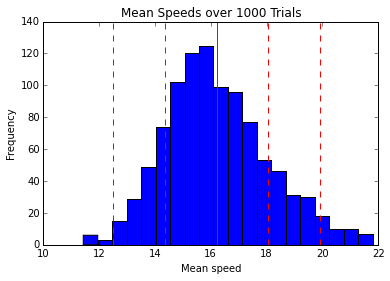

In [23]:
plt.hist(data_mean_speeds, bins = 20)
ymin, ymax = plt.ylim()
mean = np.mean(data_mean_speeds)
stdev = np.std(data_mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 1000 Trials")
plt.show()

#Conclusion
Since the mode of the average is 16, with the second most common average speed being 15, I would suggest making 16 the base from which you add the standard deviation.  Using this data, a recommendation would be at 26.6 m/s, using the average standard deviation of 10.6.  This is the same as the previous recommendation of 26.6 m/s.  

##Plotting one trial in 3D: Time/Speed/Location

In [24]:
from mpl_toolkits.mplot3d import Axes3D

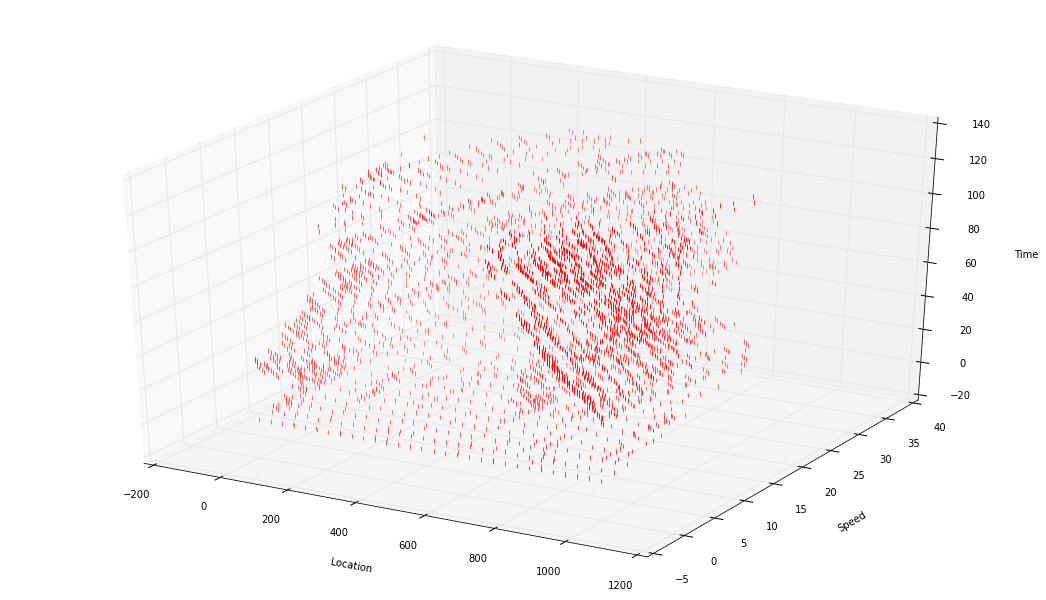

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5,10.5)
x = nine_simulations[8][0]
z = [[i] * 30 for i in range(121)]
y = nine_simulations[8][1]
#plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
#plt.scatter(location, y, marker="|", c = ["y","g","b","k","r"])

ax.scatter(x, y, z, marker="|", c = ["r"])

ax.set_xlabel('Location')
ax.set_zlabel('Time')
ax.set_ylabel('Speed')

plt.show()

##Let's see what happens when we add more cars to the road

Trials with 40 Cars
Mean Speed over 100 Trials: 11.048425000000002
Mean StDev of Speed over 100 Trials: 9.040054672123556


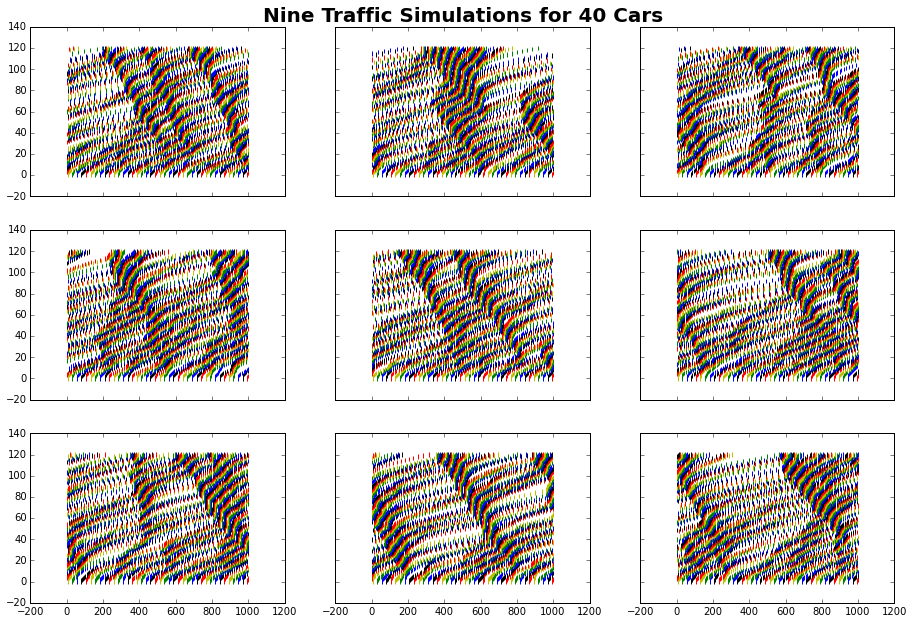

In [26]:
cars = 40
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

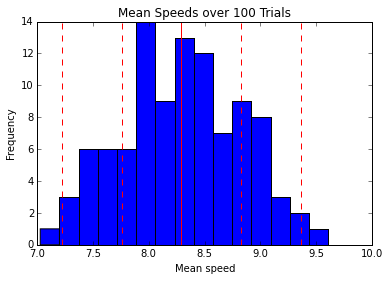

In [30]:
plt.hist(mean_speeds, bins = 15)
ymin, ymax = plt.ylim()
mean = np.mean(mean_speeds)
stdev = np.std(mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 100 Trials")
plt.show()

Trials with 50 Cars
Mean Speed over 100 Trials: 8.299523333333333
Mean StDev of Speed over 100 Trials: 7.037496097193453


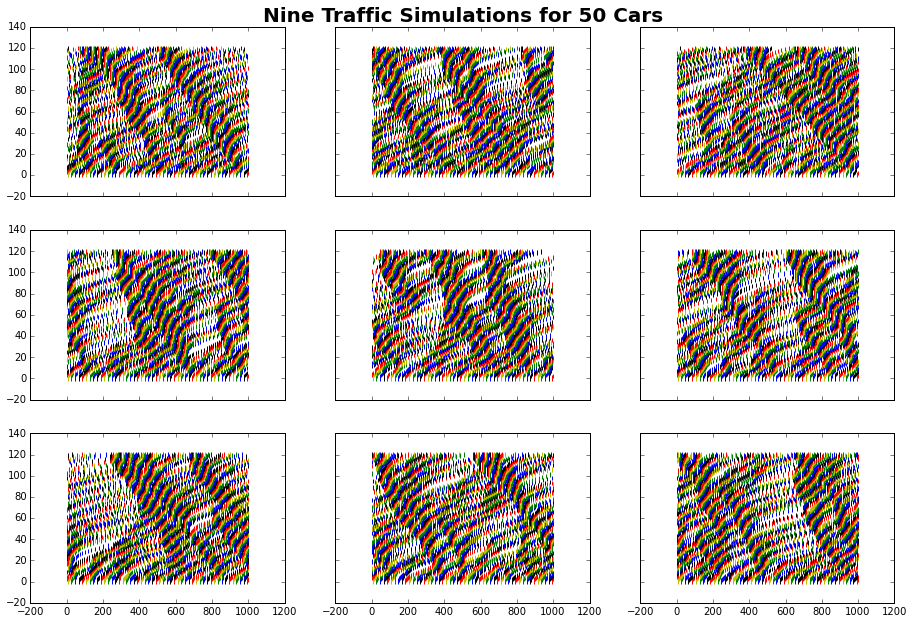

In [31]:
cars = 50
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

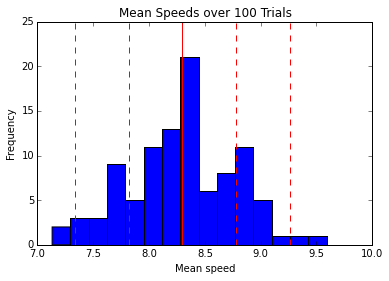

In [32]:
plt.hist(mean_speeds, bins = 15)
ymin, ymax = plt.ylim()
mean = np.mean(mean_speeds)
stdev = np.std(mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 100 Trials")
plt.show()

Trials with 60 Cars
Mean Speed over 100 Trials: 6.372222222222223
Mean StDev of Speed over 100 Trials: 5.742625243818599


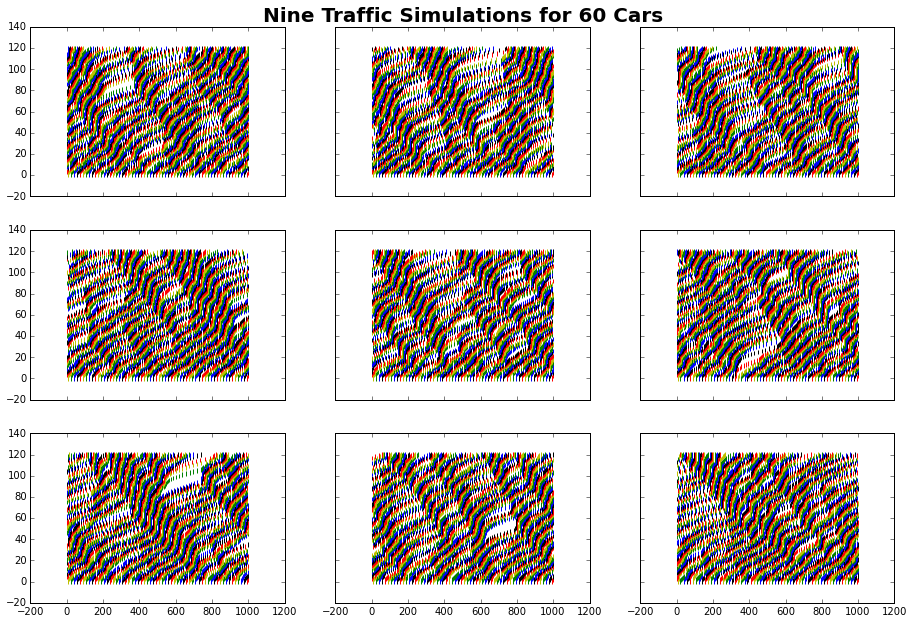

In [33]:
cars = 60
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

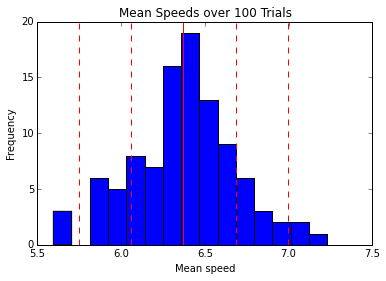

In [34]:
plt.hist(mean_speeds, bins = 15)
ymin, ymax = plt.ylim()
mean = np.mean(mean_speeds)
stdev = np.std(mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 100 Trials")
plt.show()

Trials with 70 Cars
Mean Speed over 100 Trials: 4.96784761904762
Mean StDev of Speed over 100 Trials: 4.597925294717029


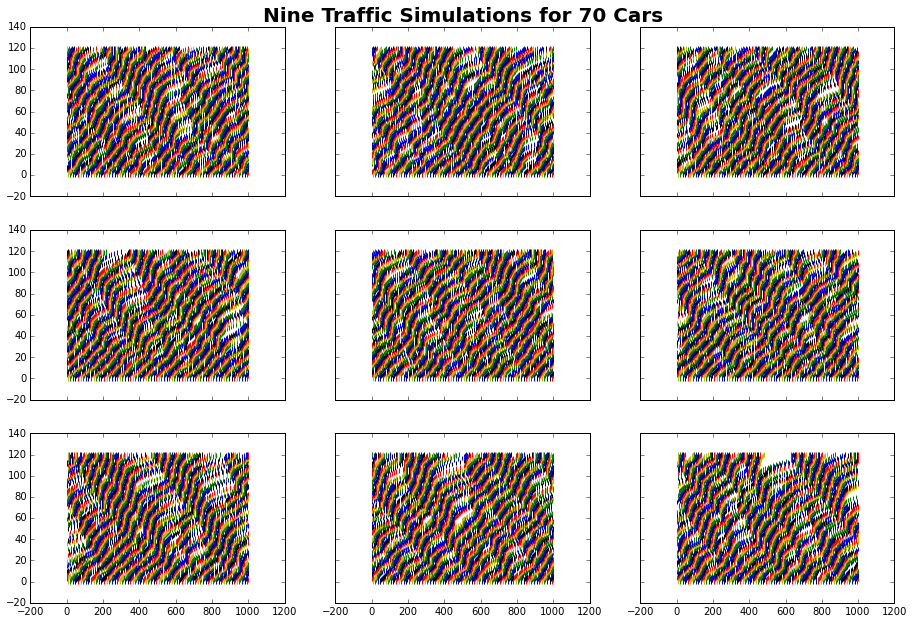

In [35]:
cars = 70
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

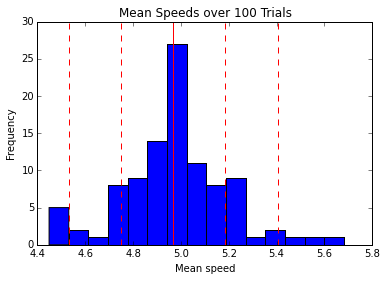

In [36]:
plt.hist(mean_speeds, bins = 15)
ymin, ymax = plt.ylim()
mean = np.mean(mean_speeds)
stdev = np.std(mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 100 Trials")
plt.show()

##Plot the average speeds for 30, 40, 50, 60, 70 cars as a bar chart.

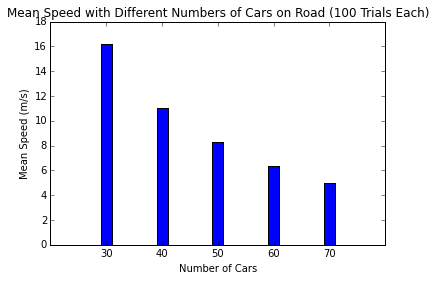

In [38]:
x = [30, 40, 50, 60, 70]
y = [16.20, 11.04, 8.29, 6.37, 4.97]
labels = []
plt.bar(x, y, width=2, align='center')
plt.xlabel("Number of Cars")
plt.xticks(x, x)
plt.ylabel("Mean Speed (m/s)")
plt.title("Mean Speed with Different Numbers of Cars on Road (100 Trials Each)")
plt.show()